In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tanzania/train_features.csv
/kaggle/input/tanzania/test_features.csv
/kaggle/input/tanzania/train_label.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option("display.max_rows", None)

In [4]:
df = pd.read_csv("/kaggle/input/tanzania/train_features.csv")
labels = pd.read_csv("/kaggle/input/tanzania/train_label.csv")

In [5]:
df.copy().isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [6]:
df_f = df.merge(labels, on="id")

In [7]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df_f.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
df_f.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [10]:
df_f["year_recorded"] = pd.DatetimeIndex(df_f["date_recorded"]).year
df_f["month_recorded"] = pd.DatetimeIndex(df_f["date_recorded"]).month
# df_f.drop("date_recorded", axis=1, inplace=True)

In [11]:
columns_to_drop = ['date_recorded', 'wpt_name', 'num_private',
        'region', 'extraction_type_group', 'extraction_type_class', 'payment_type',
       'water_quality', 'quality_group', 'quantity_group', 'source_type', 'source_class',
       'waterpoint_type_group', 'status_group']

In [12]:
df_f.drop(columns=columns_to_drop, axis=1,inplace=True)

In [13]:
from catboost import CatBoostClassifier

In [14]:
df_f.fillna(-1, inplace=True)

In [15]:
df_f.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,management,management_group,payment,quantity,source,waterpoint_type,year_recorded,month_recorded
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,vwc,user-group,pay annually,enough,spring,communal standpipe,2011,3
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,20,2,Serengeti,Natta,280,-1,GeoData Consultants Ltd,Other,-1,True,2010,gravity,wug,user-group,never pay,insufficient,rainwater harvesting,communal standpipe,2013,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,user-group,pay per bucket,enough,dam,communal standpipe multiple,2013,2
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,-1,True,1986,submersible,vwc,user-group,never pay,dry,machine dbh,communal standpipe multiple,2013,1
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,-1,-1,True,0,gravity,other,other,never pay,seasonal,rainwater harvesting,communal standpipe,2011,7


In [16]:
obj_cols = []
num_cols = []
for i,val in df_f.dtypes.items():
    if val == "object":
        obj_cols.append(i)
    else:
        num_cols.append(i)

In [17]:
len(obj_cols)

18

In [18]:
len(num_cols)

11

In [19]:
cb = CatBoostClassifier(cat_features=obj_cols)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_f
y = labels["status_group"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,management,management_group,payment,quantity,source,waterpoint_type,year_recorded,month_recorded
43069,9358,500.0,Roman Catholic,1846,ACRA,34.800636,-9.129801,Rufiji,Kati,11,4,Njombe,Mdandu,45,True,GeoData Consultants Ltd,WUA,mtwango water supply scheme,True,2009,gravity,wua,user-group,pay monthly,dry,spring,communal standpipe,2011,4
58858,31628,0.0,Unicef,0,UNICEF,30.543999,-2.782740,Lake Victoria,Mrukakamo,18,30,Ngara,Bukiriro,0,True,GeoData Consultants Ltd,WUG,-1,False,0,india mark ii,wug,user-group,never pay,enough,shallow well,hand pump,2011,7
41707,15603,0.0,Ncaa,1840,NCAA,35.271696,-3.216203,Internal,Madukani,2,5,Ngorongoro,Endulen,135,True,GeoData Consultants Ltd,VWC,-1,True,2005,mono,vwc,user-group,never pay,insufficient,machine dbh,communal standpipe,2013,3
30674,37051,0.0,Kkkt,1202,KKKT,38.456975,-4.910817,Pangani,Kishewa,4,1,Lushoto,Funta,1,True,GeoData Consultants Ltd,VWC,Kong`hoi,True,1975,gravity,vwc,user-group,never pay,enough,spring,communal standpipe,2011,3
20944,52389,30.0,Jaica,60,JAICA,39.280799,-7.031265,Wami / Ruvu,Kisemvule Mjini,60,43,Mkuranga,Vikindu,1041,True,GeoData Consultants Ltd,VWC,-1,False,2010,submersible,vwc,user-group,pay per bucket,enough,machine dbh,communal standpipe,2011,2


In [24]:
cb.fit(X_train,y_train)

Learning rate set to 0.095694
0:	learn: 1.0226842	total: 510ms	remaining: 8m 29s
1:	learn: 0.9646344	total: 951ms	remaining: 7m 54s
2:	learn: 0.9183165	total: 1.34s	remaining: 7m 25s
3:	learn: 0.8782339	total: 1.81s	remaining: 7m 30s
4:	learn: 0.8438107	total: 2.19s	remaining: 7m 16s
5:	learn: 0.8151839	total: 2.58s	remaining: 7m 7s
6:	learn: 0.7910211	total: 3.01s	remaining: 7m 7s
7:	learn: 0.7680043	total: 3.43s	remaining: 7m 5s
8:	learn: 0.7489274	total: 3.85s	remaining: 7m 4s
9:	learn: 0.7324792	total: 4.26s	remaining: 7m 1s
10:	learn: 0.7176565	total: 4.68s	remaining: 7m
11:	learn: 0.7046422	total: 5.07s	remaining: 6m 57s
12:	learn: 0.6896921	total: 5.4s	remaining: 6m 49s
13:	learn: 0.6771620	total: 5.74s	remaining: 6m 43s
14:	learn: 0.6663036	total: 6.05s	remaining: 6m 37s
15:	learn: 0.6565019	total: 6.38s	remaining: 6m 32s
16:	learn: 0.6478991	total: 6.75s	remaining: 6m 30s
17:	learn: 0.6401664	total: 7.06s	remaining: 6m 25s
18:	learn: 0.6334720	total: 7.5s	remaining: 6m 27s
19:

In [27]:
importance = cb.feature_importances_

In [77]:
importance

29

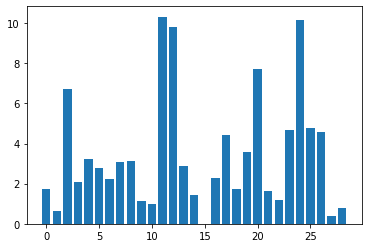

In [28]:
plt.bar(range(len(importance)), importance)
plt.show()

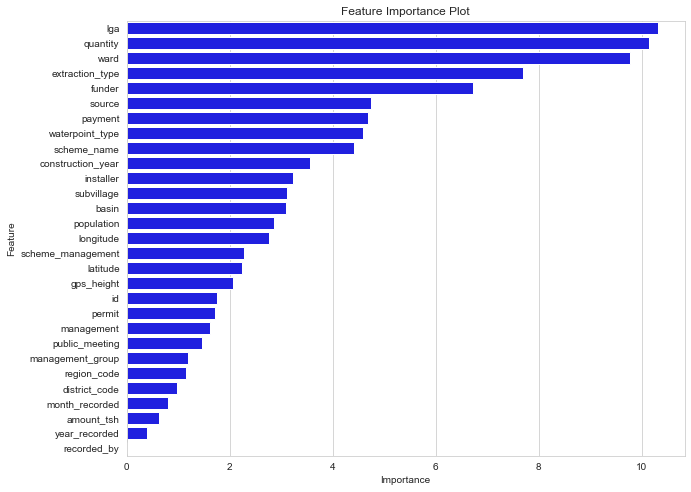

In [29]:
importance_dict = dict(zip(df_f.columns, importance))

# Convert dictionary to pandas DataFrame
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])

# Sort features by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance using seaborn barplot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='b')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [30]:
prediction = cb.predict(X_test)

In [31]:
pred_prob = cb.predict_proba(X_test)

In [32]:
from sklearn.metrics import roc_auc_score, classification_report

In [33]:
print(classification_report(y_test, prediction))

                         precision    recall  f1-score   support



             functional       0.80      0.91      0.85      9724

functional needs repair       0.63      0.30      0.41      1293

         non functional       0.85      0.77      0.80      6803



               accuracy                           0.81     17820

              macro avg       0.76      0.66      0.69     17820

           weighted avg       0.80      0.81      0.80     17820




In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,prediction)

0.8089225589225589

In [51]:
df_test = pd.read_csv("/kaggle/input/tanzania/test_features.csv")

In [52]:
df_test["year_recorded"] = pd.DatetimeIndex(df_test["date_recorded"]).year
df_test["month_recorded"] = pd.DatetimeIndex(df_test["date_recorded"]).month

In [53]:
columns_to_drop = ['date_recorded', 'wpt_name', 'num_private',
        'region', 'extraction_type_group', 'extraction_type_class', 'payment_type',
       'water_quality', 'quality_group', 'quantity_group', 'source_type', 'source_class',
       'waterpoint_type_group']

In [54]:
df_test.drop(columns=columns_to_drop, axis=1,inplace=True)

In [55]:
df_test.fillna(-1, inplace=True)

In [56]:
obj_cols = []
num_cols = []
for i,val in df_test.dtypes.items():
    if val == "object":
        obj_cols.append(i)
    else:
        num_cols.append(i)

In [57]:
len(obj_cols)

18

In [58]:
len(num_cols)

11

In [59]:
X_train

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,management,management_group,payment,quantity,source,waterpoint_type,year_recorded,month_recorded
43069,9358,500.0,Roman Catholic,1846,ACRA,34.800636,-9.129801,Rufiji,Kati,11,4,Njombe,Mdandu,45,True,GeoData Consultants Ltd,WUA,mtwango water supply scheme,True,2009,gravity,wua,user-group,pay monthly,dry,spring,communal standpipe,2011,4
58858,31628,0.0,Unicef,0,UNICEF,30.543999,-2.782740,Lake Victoria,Mrukakamo,18,30,Ngara,Bukiriro,0,True,GeoData Consultants Ltd,WUG,-1,False,0,india mark ii,wug,user-group,never pay,enough,shallow well,hand pump,2011,7
41707,15603,0.0,Ncaa,1840,NCAA,35.271696,-3.216203,Internal,Madukani,2,5,Ngorongoro,Endulen,135,True,GeoData Consultants Ltd,VWC,-1,True,2005,mono,vwc,user-group,never pay,insufficient,machine dbh,communal standpipe,2013,3
30674,37051,0.0,Kkkt,1202,KKKT,38.456975,-4.910817,Pangani,Kishewa,4,1,Lushoto,Funta,1,True,GeoData Consultants Ltd,VWC,Kong`hoi,True,1975,gravity,vwc,user-group,never pay,enough,spring,communal standpipe,2011,3
20944,52389,30.0,Jaica,60,JAICA,39.280799,-7.031265,Wami / Ruvu,Kisemvule Mjini,60,43,Mkuranga,Vikindu,1041,True,GeoData Consultants Ltd,VWC,-1,False,2010,submersible,vwc,user-group,pay per bucket,enough,machine dbh,communal standpipe,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,68525,1000.0,Dhv,327,DWE,36.367112,-8.774761,Rufiji,Bwawani,5,4,Ulanga,Mtimbira,255,True,GeoData Consultants Ltd,Water Board,Mtimbira,True,1995,gravity,wug,user-group,pay monthly,enough,river,communal standpipe,2011,3
38158,11980,1000.0,Danida,1743,DANID,34.531524,-9.769604,Lake Nyasa,Mlangali Ndani,11,5,Ludewa,Mlangali,35,True,GeoData Consultants Ltd,VWC,DANIDA,False,1988,gravity,vwc,user-group,pay annually,seasonal,spring,communal standpipe,2011,3
860,35778,0.0,Omar Ally,-13,Omar Ally,38.974416,-5.420823,Pangani,Sokoni,4,5,Pangani,Pangani Mashariki,1000,False,GeoData Consultants Ltd,Private operator,-1,False,2005,other,private operator,commercial,never pay,insufficient,shallow well,other,2011,3
15795,49444,0.0,Rwssp,0,WEDECO,34.316586,-3.107161,Lake Victoria,Ijosho,17,6,Meatu,Sakasaka,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,wug,user-group,never pay,enough,shallow well,hand pump,2012,10


In [60]:
df_test

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,management,management_group,payment,quantity,source,waterpoint_type,year_recorded,month_recorded
0,50785,0.0,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Magoma,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,-1,True,2012,other,parastatal,parastatal,never pay,seasonal,rainwater harvesting,other,2013,2
1,51630,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Kimnyak,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,vwc,user-group,never pay,insufficient,spring,communal standpipe,2013,2
2,17168,0.0,-1,1567,-1,34.767863,-5.004344,Internal,Msatu,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,-1,2010,other,vwc,user-group,never pay,insufficient,rainwater harvesting,other,2013,2
3,45559,0.0,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Kipindimbi,80,43,Liwale,Mkutano,250,-1,GeoData Consultants Ltd,VWC,-1,True,1987,other,vwc,user-group,unknown,dry,shallow well,other,2013,1
4,49871,500.0,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Losonga,10,3,Mbinga,Mbinga Urban,60,-1,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,water board,user-group,pay monthly,enough,spring,communal standpipe,2013,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,Danida,34,Da,38.852669,-6.582841,Wami / Ruvu,Yombo,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,vwc,user-group,never pay,enough,river,communal standpipe,2011,2
14846,18990,1000.0,Hiap,0,HIAP,37.451633,-5.350428,Pangani,Mkondoa,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,-1,False,1994,nira/tanira,vwc,user-group,pay annually,insufficient,shallow well,hand pump,2011,3
14847,28749,0.0,-1,1476,-1,34.739804,-4.585587,Internal,Juhudi,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,-1,-1,2010,gravity,vwc,user-group,never pay,insufficient,dam,communal standpipe,2013,3
14848,33492,0.0,Germany,998,DWE,35.432732,-10.584159,Lake Nyasa,Namakinga B,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,vwc,user-group,never pay,insufficient,river,communal standpipe,2013,2


In [62]:
test_pred = cb.predict(df_test)

In [65]:
df_test.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management', 'management_group', 'payment',
       'quantity', 'source', 'waterpoint_type', 'year_recorded',
       'month_recorded'],
      dtype='object')

In [66]:
submission_df = df_test.drop(columns=['funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management', 'management_group', 'payment',
       'quantity', 'source', 'waterpoint_type', 'year_recorded',
       'month_recorded'], axis=1)

In [68]:
submission_df["status_group"] = test_pred

In [70]:
submission_df.drop("amount_tsh", axis=1,inplace=True)

In [73]:
submission_df.set_index("id",inplace=True)

In [74]:
submission_df

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
...,...
39307,non functional
18990,functional
28749,functional


In [75]:
submission_df.to_csv("submission.csv")

In [79]:
X_train.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management', 'management_group', 'payment',
       'quantity', 'source', 'waterpoint_type', 'year_recorded',
       'month_recorded'],
      dtype='object')

In [93]:
imp_df = pd.DataFrame({'feature':X_train.columns, 'importance':importance})

In [97]:
imp_df.sort_values(by="importance",inplace=True)

In [99]:
imp_df[imp_df["importance"]>1]

,feature,importance
9,region_code,1.144499
22,management_group,1.195319
14,public_meeting,1.456540
21,management,1.613896
18,permit,1.711674
0,id,1.754987
3,gps_height,2.071702
6,latitude,2.238040
16,scheme_management,2.272869
5,longitude,2.772406


In [91]:
importance

array([ 1.75498651,  0.63850413,  6.71847819,  2.07170211,  3.23973955,
        2.77240632,  2.23803988,  3.0888892 ,  3.10889674,  1.14449895,
        0.97865559, 10.31592553,  9.77946402,  2.86848289,  1.4565396 ,
        0.        ,  2.27286905,  4.40655855,  1.71167398,  3.55661448,
        7.69859765,  1.61389555,  1.1953191 ,  4.69141208, 10.13317188,
        4.75001321,  4.58933739,  0.40402865,  0.80129925])